In [1]:
import os, sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F

from training_tools import CustomImageDataset, CustomImageDatasetTest, AlexNet, training_loop, plot_loss_acc
from general_tools import custom_sort

from ResNet import Bottleneck, ResNet, ResNet50, ResNet101

blues_path = os.path.join(os.getcwd(), "blues")
classique_path = os.path.join(os.getcwd(), "classique")
electro_path = os.path.join(os.getcwd(), "electro")
hardrock_path = os.path.join(os.getcwd(), "hardrock")
techno_path = os.path.join(os.getcwd(), "techno")
jazz_path = os.path.join(os.getcwd(), "jazz")
discofs_path = os.path.join(os.getcwd(), "discofs")

### Loading data

In [2]:
path_to_train = os.path.join(os.getcwd(), "data_train")
path_to_test = os.path.join(os.getcwd(), "data_test")
id_label_train = os.path.join(os.getcwd(), "train.csv")

dic_label = {"blues": 0, "classique": 1, "electro": 2, "hardrock": 3, "techno": 4, "jazz": 5, "discofs": 6}

initial_transform = transforms.Compose([
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

augmented_transform = transforms.Compose([
    transforms.CenterCrop(256),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = CustomImageDataset(annotations_file=id_label_train, img_dir=path_to_train, transform=augmented_transform)
test_dataset = CustomImageDatasetTest(image_dir=path_to_test, transform=initial_transform)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_subset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

Feature batch shape: torch.Size([16, 1, 256, 256])
Labels batch shape: torch.Size([16])


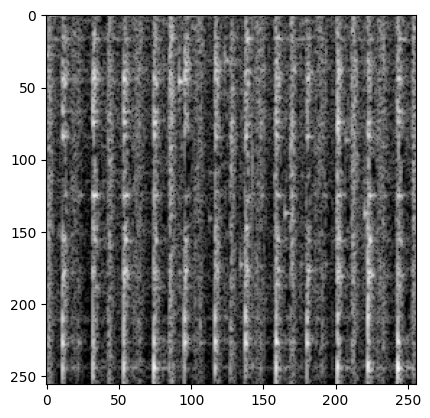

Label: 5, Name sound: extrait 1 Leyte.mp3.png


In [3]:
train_features, train_labels, train_sound = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
sound = train_sound[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}, Name sound: {sound}")

Feature batch shape: torch.Size([16, 1, 256, 256])


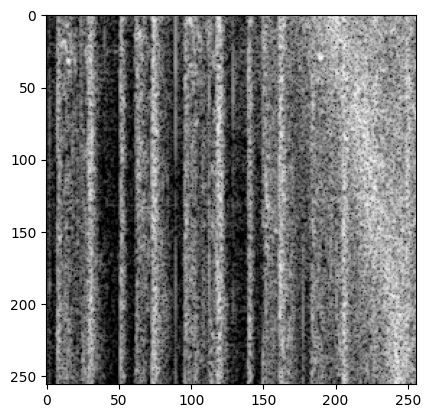

Name sound: extrait 3 Witchoo.mp3.png


In [4]:
train_features, train_sound = next(iter(test_loader))
print(f"Feature batch shape: {train_features.size()}")
img = train_features[0].squeeze()
sound = train_sound[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Name sound: {sound}")

### AlexNet

In [5]:
model = AlexNet(num_channels=1, num_classes=7)

total_params = sum(p.numel() for p in model.parameters())
print("Nombre total de paramètres :", total_params)

Nombre total de paramètres : 23916711


In [6]:
loss_train_list, loss_val_list, acc_train_list, acc_val_list = \
training_loop(epochs=20, lr=1e-3, model=model, data_train=train_loader, data_val=val_loader, weight_decay=5e-4)

  5%|▌         | 1/20 [00:22<07:05, 22.41s/it]

Epoch [1/20], TRAIN: Loss: 1.9592, Accuracy: 0.1469 ; TEST: Loss: 1.8668, Accuracy: 0.2518


 10%|█         | 2/20 [00:44<06:38, 22.11s/it]

Epoch [2/20], TRAIN: Loss: 1.7599, Accuracy: 0.2893 ; TEST: Loss: 1.7014, Accuracy: 0.3571


 15%|█▌        | 3/20 [01:05<06:09, 21.74s/it]

Epoch [3/20], TRAIN: Loss: 1.7225, Accuracy: 0.3263 ; TEST: Loss: 1.6713, Accuracy: 0.4054


 20%|██        | 4/20 [01:28<05:53, 22.10s/it]

Epoch [4/20], TRAIN: Loss: 1.6925, Accuracy: 0.3616 ; TEST: Loss: 1.6810, Accuracy: 0.4750


 25%|██▌       | 5/20 [01:48<05:23, 21.56s/it]

Epoch [5/20], TRAIN: Loss: 1.6877, Accuracy: 0.3777 ; TEST: Loss: 1.6031, Accuracy: 0.4679


 30%|███       | 6/20 [02:09<04:56, 21.17s/it]

Epoch [6/20], TRAIN: Loss: 1.6320, Accuracy: 0.4460 ; TEST: Loss: 1.5991, Accuracy: 0.5393


 35%|███▌      | 7/20 [02:30<04:37, 21.33s/it]

Epoch [7/20], TRAIN: Loss: 1.6089, Accuracy: 0.4705 ; TEST: Loss: 1.6195, Accuracy: 0.4768


 40%|████      | 8/20 [02:52<04:15, 21.31s/it]

Epoch [8/20], TRAIN: Loss: 1.5692, Accuracy: 0.5134 ; TEST: Loss: 1.6991, Accuracy: 0.5482


 45%|████▌     | 9/20 [03:13<03:54, 21.34s/it]

Epoch [9/20], TRAIN: Loss: 1.5305, Accuracy: 0.5473 ; TEST: Loss: 1.5183, Accuracy: 0.5768


 50%|█████     | 10/20 [03:35<03:35, 21.51s/it]

Epoch [10/20], TRAIN: Loss: 1.5262, Accuracy: 0.5580 ; TEST: Loss: 1.5332, Accuracy: 0.6054


 55%|█████▌    | 11/20 [03:56<03:11, 21.32s/it]

Epoch [11/20], TRAIN: Loss: 1.4796, Accuracy: 0.5710 ; TEST: Loss: 1.3836, Accuracy: 0.6429


 60%|██████    | 12/20 [04:17<02:50, 21.26s/it]

Epoch [12/20], TRAIN: Loss: 1.4356, Accuracy: 0.5996 ; TEST: Loss: 1.4151, Accuracy: 0.6500


 65%|██████▌   | 13/20 [04:39<02:30, 21.54s/it]

Epoch [13/20], TRAIN: Loss: 1.4610, Accuracy: 0.5768 ; TEST: Loss: 1.4609, Accuracy: 0.6000


 70%|███████   | 14/20 [05:00<02:08, 21.35s/it]

Epoch [14/20], TRAIN: Loss: 1.4446, Accuracy: 0.6143 ; TEST: Loss: 1.5228, Accuracy: 0.6054


 75%|███████▌  | 15/20 [05:21<01:46, 21.33s/it]

Epoch [15/20], TRAIN: Loss: 1.4029, Accuracy: 0.6116 ; TEST: Loss: 1.3645, Accuracy: 0.6607


 80%|████████  | 16/20 [05:42<01:24, 21.21s/it]

Epoch [16/20], TRAIN: Loss: 1.3797, Accuracy: 0.6156 ; TEST: Loss: 1.3659, Accuracy: 0.6446


 85%|████████▌ | 17/20 [06:03<01:02, 20.96s/it]

Epoch [17/20], TRAIN: Loss: 1.3487, Accuracy: 0.6469 ; TEST: Loss: 1.4451, Accuracy: 0.6268


 90%|█████████ | 18/20 [06:25<00:42, 21.23s/it]

Epoch [18/20], TRAIN: Loss: 1.3408, Accuracy: 0.6357 ; TEST: Loss: 1.3886, Accuracy: 0.6286


 95%|█████████▌| 19/20 [06:45<00:21, 21.11s/it]

Epoch [19/20], TRAIN: Loss: 1.3313, Accuracy: 0.6379 ; TEST: Loss: 1.3228, Accuracy: 0.6875


100%|██████████| 20/20 [07:07<00:00, 21.37s/it]

Epoch [20/20], TRAIN: Loss: 1.2923, Accuracy: 0.6518 ; TEST: Loss: 1.2726, Accuracy: 0.6661


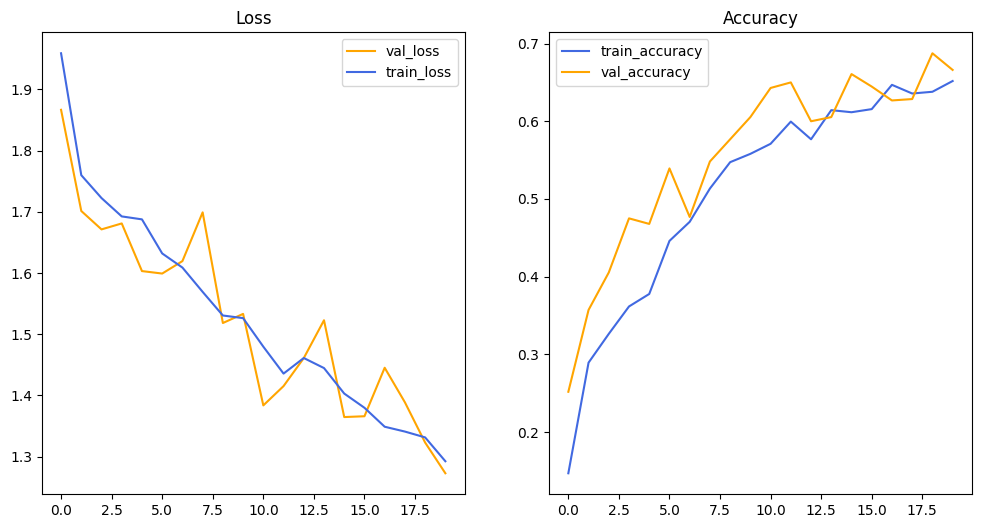

In [7]:
plot_loss_acc(loss_val_list, loss_train_list, acc_val_list, acc_train_list, figsize=(12, 6))

### ResNet

In [5]:
model = ResNet50(num_classes=7, channels=1)
total_params = sum(p.numel() for p in model.parameters())
print("Nombre total de paramètres :", total_params)

Nombre total de paramètres : 23542599


In [6]:
loss_train_list, loss_val_list, acc_train_list, acc_val_list = \
training_loop(epochs=15, lr=1e-3, model=model, data_train=train_loader, data_val=val_loader, weight_decay=5e-4)

  7%|▋         | 1/15 [01:11<16:41, 71.57s/it]

Epoch [1/15], TRAIN: Loss: 1.9756, Accuracy: 0.3625 ; TEST: Loss: 9.7189, Accuracy: 0.3893


 13%|█▎        | 2/15 [02:21<15:18, 70.68s/it]

Epoch [2/15], TRAIN: Loss: 1.7137, Accuracy: 0.3862 ; TEST: Loss: 5.3874, Accuracy: 0.3393


 20%|██        | 3/15 [03:29<13:52, 69.38s/it]

Epoch [3/15], TRAIN: Loss: 1.6884, Accuracy: 0.4241 ; TEST: Loss: 1.6442, Accuracy: 0.4643


 27%|██▋       | 4/15 [04:35<12:28, 68.00s/it]

Epoch [4/15], TRAIN: Loss: 1.6366, Accuracy: 0.4219 ; TEST: Loss: 1.5316, Accuracy: 0.4893


 33%|███▎      | 5/15 [05:44<11:23, 68.39s/it]

Epoch [5/15], TRAIN: Loss: 1.5796, Accuracy: 0.4696 ; TEST: Loss: 1.5839, Accuracy: 0.5571


 40%|████      | 6/15 [06:52<10:13, 68.12s/it]

Epoch [6/15], TRAIN: Loss: 1.5445, Accuracy: 0.5018 ; TEST: Loss: 1.6447, Accuracy: 0.4821


 47%|████▋     | 7/15 [08:00<09:06, 68.30s/it]

Epoch [7/15], TRAIN: Loss: 1.4353, Accuracy: 0.5634 ; TEST: Loss: 1.4914, Accuracy: 0.5446


 53%|█████▎    | 8/15 [09:09<08:00, 68.61s/it]

Epoch [8/15], TRAIN: Loss: 1.4133, Accuracy: 0.5746 ; TEST: Loss: 1.4217, Accuracy: 0.5661


 60%|██████    | 9/15 [10:18<06:51, 68.57s/it]

Epoch [9/15], TRAIN: Loss: 1.4321, Accuracy: 0.5786 ; TEST: Loss: 1.8871, Accuracy: 0.4732


 67%|██████▋   | 10/15 [11:27<05:43, 68.66s/it]

Epoch [10/15], TRAIN: Loss: 1.3535, Accuracy: 0.6134 ; TEST: Loss: 1.3239, Accuracy: 0.6054


 73%|███████▎  | 11/15 [12:37<04:36, 69.01s/it]

Epoch [11/15], TRAIN: Loss: 1.3147, Accuracy: 0.6277 ; TEST: Loss: 1.3097, Accuracy: 0.6339


 80%|████████  | 12/15 [13:41<03:22, 67.56s/it]

Epoch [12/15], TRAIN: Loss: 1.3152, Accuracy: 0.6192 ; TEST: Loss: 1.9775, Accuracy: 0.5143


 87%|████████▋ | 13/15 [14:50<02:15, 67.93s/it]

Epoch [13/15], TRAIN: Loss: 1.2904, Accuracy: 0.6446 ; TEST: Loss: 1.2822, Accuracy: 0.6232


 93%|█████████▎| 14/15 [15:58<01:08, 68.14s/it]

Epoch [14/15], TRAIN: Loss: 1.2637, Accuracy: 0.6375 ; TEST: Loss: 1.5491, Accuracy: 0.5125


100%|██████████| 15/15 [17:08<00:00, 68.57s/it]

Epoch [15/15], TRAIN: Loss: 1.2581, Accuracy: 0.6469 ; TEST: Loss: 1.4906, Accuracy: 0.5536


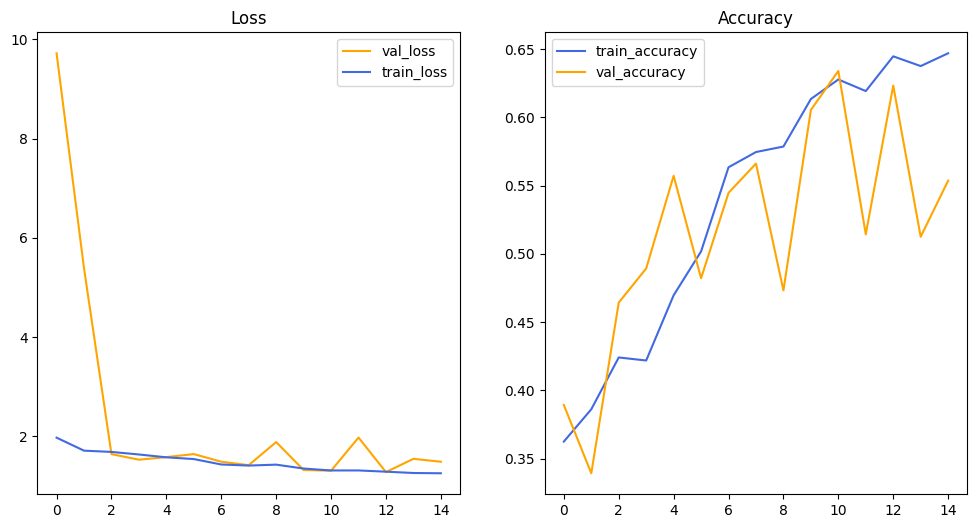

In [7]:
plot_loss_acc(loss_val_list, loss_train_list, acc_val_list, acc_train_list, figsize=(12, 6))

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

df_test = pd.DataFrame(columns = ["proba", "name"])

with torch.no_grad():
        for i, data in enumerate(test_loader):    
            inputs, sounds = data
            inputs = inputs.to(device)
            outputs = model(inputs)

            df_new = pd.DataFrame({
                "proba": [list(p) for p in F.softmax(outputs, dim=1).cpu().numpy()],
                "name": np.array(sounds)
            })

            df_test = pd.concat([df_test, df_new])

df_test = df_test.reset_index(drop=True)

In [9]:
df_test = df_test.sort_values(by="name", key=custom_sort)

df_test = df_test.groupby(df_test['name'].str[10:])

def mean_of_lists(series):
    return np.mean(np.array(series.tolist()), axis=0)

df_test = df_test["proba"].agg(mean_of_lists).reset_index()

In [10]:
df_test["label_pred"] = df_test["proba"].apply(lambda x: x.argmax())
df_test["register_pred"] = df_test["label_pred"].apply(lambda x: list(dic_label.keys())[x])
df_test["percent_pred"] = df_test["proba"].apply(lambda x: f"{np.round(x.max()* 100, 1)} %")

In [11]:
test_label = []

for sound in df_test["name"].str[:-4]:
    for label, path_register in enumerate([blues_path, classique_path, electro_path, hardrock_path, techno_path, jazz_path, discofs_path]):
        
        sound_path = os.path.join(path_register, sound)

        if os.path.exists(sound_path):
            test_label.append(label)

df_test["true_label"] = test_label

In [16]:
df_test

,name,proba,label_pred,register_pred,percent_pred,true_label
0,Sleepless.mp3.png,"[0.25500214, 0.02064253, 0.12414465, 0.0319872...",6,discofs,37.8 %,2
1,Snatch It Back And Hold It.mp3.png,"[0.22005102, 0.022680588, 0.21656576, 0.167527...",0,blues,22.0 %,0
2,Somebody Loan Me A Dime - Remastered.mp3.png,"[0.4586122, 0.002275703, 0.04845795, 0.0546851...",0,blues,45.9 %,0
3,Something.mp3.png,"[0.07918554, 0.0067861616, 0.32809877, 0.25761...",2,electro,32.8 %,2
4,Sometimes I Get.mp3.png,"[0.21006541, 0.03169308, 0.20148003, 0.1464191...",0,blues,21.0 %,2
...,...,...,...,...,...,...
135,シュリンプ・ダンス.mp3.png,"[0.20924418, 0.06439068, 0.13434754, 0.0777438...",0,blues,20.9 %,5
136,ジェントル・ウェイヴ.mp3.png,"[0.40282783, 0.0040620854, 0.029640716, 0.0300...",0,blues,40.3 %,5
137,ティアーズ・オブ・ザ・スター.mp3.png,"[0.27136847, 0.007912723, 0.08964306, 0.047322...",6,discofs,47.8 %,5
138,ノスタルジア・オブ・アイランド.mp3.png,"[0.34108666, 0.057411056, 0.07445367, 0.035131...",6,discofs,43.7 %,5


In [14]:
(df_test["label_pred"] == df_test["true_label"]).sum() / len(df_test)

0.45

In [15]:
dic_label = {"blues": 0, "classique": 1, "electro": 2, "hardrock": 3, "techno": 4, "jazz": 5, "discofs": 6}

registers = list(dic_label.keys())
labels = list(dic_label.values())

labels

[0, 1, 2, 3, 4, 5, 6]